<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [8]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# traigo mis funciones
import sys

sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_endoing as se

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from category_encoders import TargetEncoder

pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('..\\datos_2\\df_resultados_sin_out_2.csv', index_col=0)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,Desconocido,Modernos,manually,0.883544,golf,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04-07 03:16:57,2016,3
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,Actuales,manually,0.873418,Desconocido,-0.5,5,diesel,audi,yes,2016-04-07 01:46:50,2016,3
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,Modernos,automatic,0.544304,grand,-0.5,8,diesel,jeep,Desconocido,2016-04-05 12:47:46,2016,3
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,Modernos,manually,-0.556962,golf,0.0,6,petrol,volkswagen,no,2016-03-17 17:40:17,2016,3
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,Modernos,manually,-0.632911,fabia,-1.2,7,diesel,skoda,no,2016-04-06 10:17:21,2016,3


In [10]:
df.nunique()

dateCrawled            265281
name                   212799
seller                      2
offerType                   2
price                    5249
abtest                      2
vehicleType                 8
yearOfRegistration          5
gearbox                     3
powerCV_robust            478
model                     252
kilometer_robust           13
monthOfRegistration        13
fuelType                    8
brand                      40
notRepairedDamage           3
lastSeen               170916
year_created                3
month_created              10
dtype: int64

In [11]:
df['seller'].value_counts()

seller
private       343920
commercial         2
Name: count, dtype: int64

In [12]:
df['offerType'].value_counts(normalize=True)

offerType
offer      0.999985
request    0.000015
Name: proportion, dtype: float64

In [13]:
df['year_created'] = df['year_created'].astype('category')
df['month_created'] = df['month_created'].astype('category')

In [14]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCrawled'] = df['dateCrawled'].dt.to_period('M').astype(str)

df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df['lastSeen'] = df['lastSeen'].dt.to_period('M').astype(str)

Me cargaré las siguientes columnas porque no aportan nada a mis datos.

In [15]:
df.drop(columns=['name','seller', 'offerType'], inplace=True)


In [16]:
df.head()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03,480,test,Desconocido,Modernos,manually,0.883544,golf,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04,2016,3
1,2016-03,18300,test,coupe,Actuales,manually,0.873418,Desconocido,-0.5,5,diesel,audi,yes,2016-04,2016,3
2,2016-03,9800,test,suv,Modernos,automatic,0.544304,grand,-0.5,8,diesel,jeep,Desconocido,2016-04,2016,3
3,2016-03,1500,test,small car,Modernos,manually,-0.556962,golf,0.0,6,petrol,volkswagen,no,2016-03,2016,3
4,2016-03,3600,test,small car,Modernos,manually,-0.632911,fabia,-1.2,7,diesel,skoda,no,2016-04,2016,3


In [17]:
df.describe(include='O').T

,count,unique,top,freq
dateCrawled,343922,2,2016-03,287549
abtest,343922,2,test,178252
vehicleType,343922,8,Desconocido,120492
yearOfRegistration,343922,5,Modernos,283836
gearbox,343922,3,manually,254847
model,343922,252,golf,27825
monthOfRegistration,343922,13,3,34311
fuelType,343922,8,petrol,206992
brand,343922,40,volkswagen,73646
notRepairedDamage,343922,3,no,255586


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343922 entries, 0 to 343921
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          343922 non-null  object  
 1   price                343922 non-null  int64   
 2   abtest               343922 non-null  object  
 3   vehicleType          343922 non-null  object  
 4   yearOfRegistration   343922 non-null  object  
 5   gearbox              343922 non-null  object  
 6   powerCV_robust       343922 non-null  float64 
 7   model                343922 non-null  object  
 8   kilometer_robust     343922 non-null  float64 
 9   monthOfRegistration  343922 non-null  object  
 10  fuelType             343922 non-null  object  
 11  brand                343922 non-null  object  
 12  notRepairedDamage    343922 non-null  object  
 13  lastSeen             343922 non-null  object  
 14  year_created         343922 non-null  category
 15  month

In [19]:
df.nunique()

dateCrawled               2
price                  5249
abtest                    2
vehicleType               8
yearOfRegistration        5
gearbox                   3
powerCV_robust          478
model                   252
kilometer_robust         13
monthOfRegistration      13
fuelType                  8
brand                    40
notRepairedDamage         3
lastSeen                  2
year_created              3
month_created            10
dtype: int64

In [20]:
df.drop(columns='model', inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343922 entries, 0 to 343921
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   dateCrawled          343922 non-null  object  
 1   price                343922 non-null  int64   
 2   abtest               343922 non-null  object  
 3   vehicleType          343922 non-null  object  
 4   yearOfRegistration   343922 non-null  object  
 5   gearbox              343922 non-null  object  
 6   powerCV_robust       343922 non-null  float64 
 7   kilometer_robust     343922 non-null  float64 
 8   monthOfRegistration  343922 non-null  object  
 9   fuelType             343922 non-null  object  
 10  brand                343922 non-null  object  
 11  notRepairedDamage    343922 non-null  object  
 12  lastSeen             343922 non-null  object  
 13  year_created         343922 non-null  category
 14  month_created        343922 non-null  category
dtypes: ca

In [22]:
df.head()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03,480,test,Desconocido,Modernos,manually,0.883544,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04,2016,3
1,2016-03,18300,test,coupe,Actuales,manually,0.873418,-0.5,5,diesel,audi,yes,2016-04,2016,3
2,2016-03,9800,test,suv,Modernos,automatic,0.544304,-0.5,8,diesel,jeep,Desconocido,2016-04,2016,3
3,2016-03,1500,test,small car,Modernos,manually,-0.556962,0.0,6,petrol,volkswagen,no,2016-03,2016,3
4,2016-03,3600,test,small car,Modernos,manually,-0.632911,-1.2,7,diesel,skoda,no,2016-04,2016,3


In [23]:
lista_col_categ =  df.select_dtypes(include='O').columns.tolist()
lista_col_categ

['dateCrawled',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'lastSeen']

In [24]:
df_num, df_cat = f.separar_dataframe(df)

In [25]:
df_cat

,dateCrawled,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen
0,2016-03,test,Desconocido,Modernos,manually,Desconocido,petrol,volkswagen,Desconocido,2016-04
1,2016-03,test,coupe,Actuales,manually,5,diesel,audi,yes,2016-04
2,2016-03,test,suv,Modernos,automatic,8,diesel,jeep,Desconocido,2016-04
3,2016-03,test,small car,Modernos,manually,6,petrol,volkswagen,no,2016-03
4,2016-03,test,small car,Modernos,manually,7,diesel,skoda,no,2016-04
...,...,...,...,...,...,...,...,...,...,...
343917,2016-03,test,Desconocido,Modernos,Desconocido,1,Desconocido,sonstige_autos,Desconocido,2016-04
343918,2016-03,test,convertible,Modernos,automatic,3,petrol,smart,no,2016-03
343919,2016-03,test,bus,Modernos,manually,3,diesel,volkswagen,no,2016-04
343920,2016-03,test,combi,Modernos,manually,6,diesel,volkswagen,Desconocido,2016-03


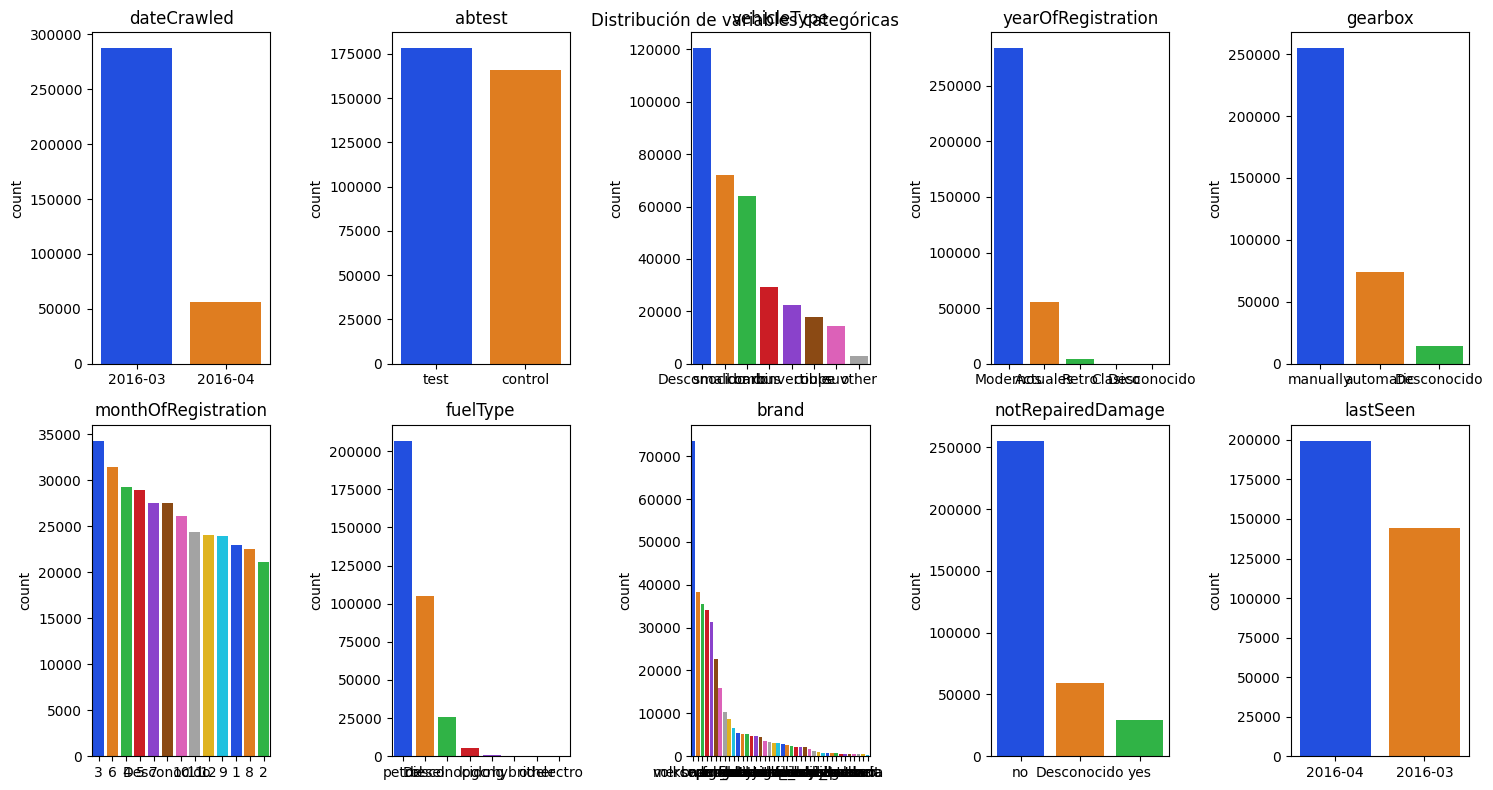

In [26]:
f.plot_categoricas(df_cat)

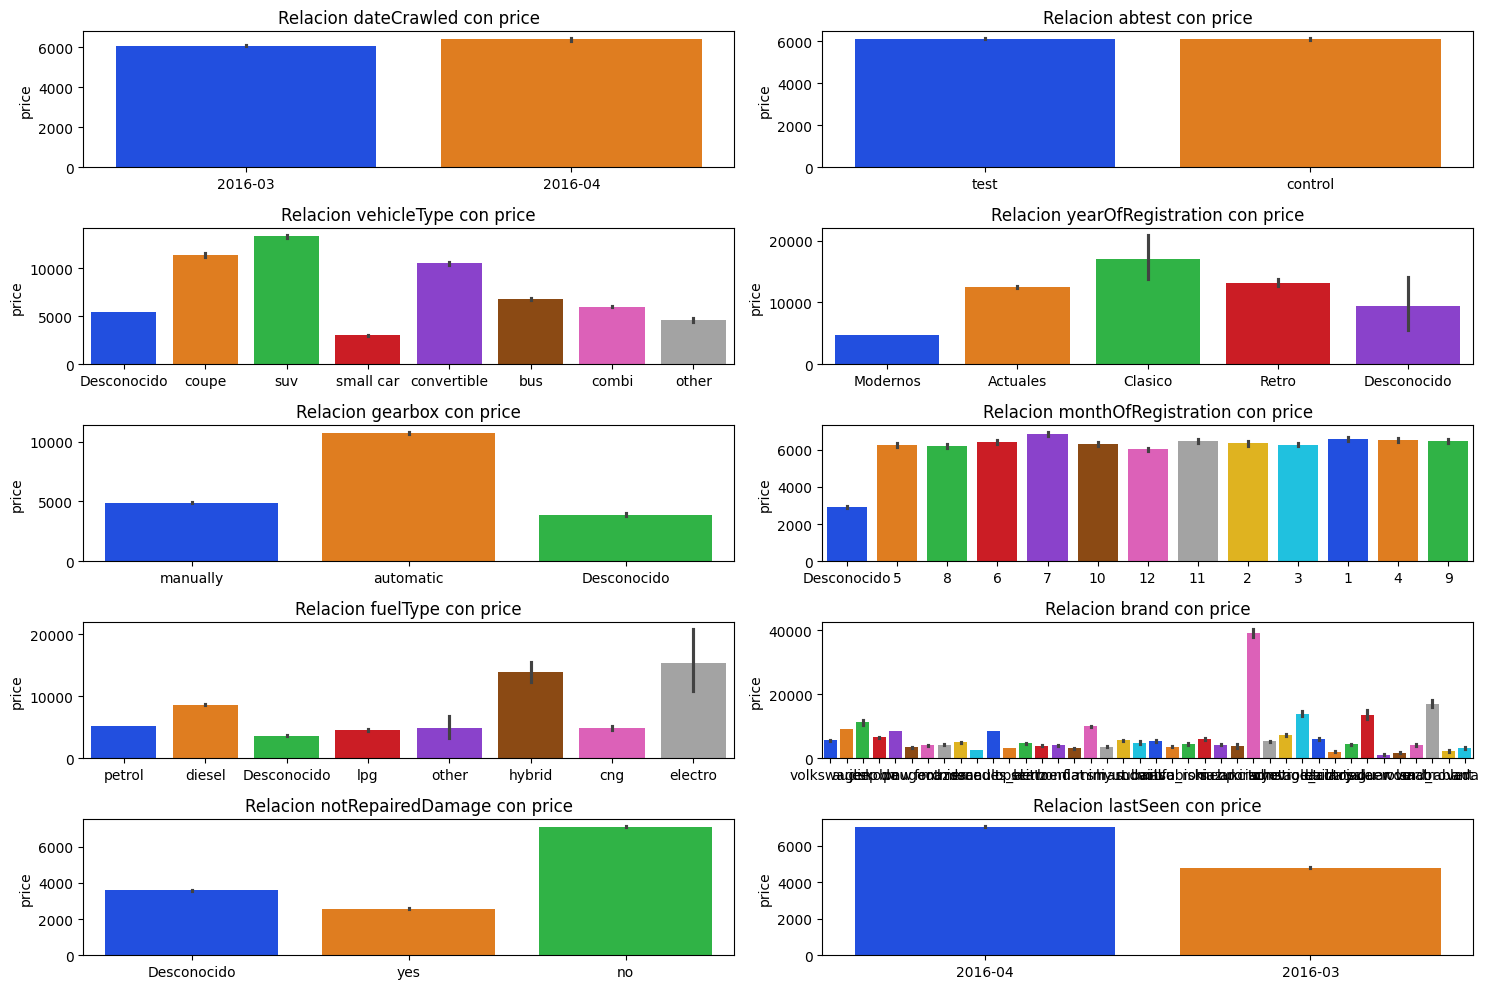

In [27]:
f.visualizar_categoricas(df, lista_col_categ, 'price', tipo_grafica='barplot')

In [29]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable DATECRAWLED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCrawled las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03', '2016-04']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 7870580487.0
Valor p: 1.4995776575113164e-27
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,326.3426,0.0,251.9161,400.7691,2016-03-2016-04



###########################

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 14752201393.0
Valor p: 0.6474718247514635
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,28.5066,0.311,-26.6409,83.6541,control-test



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Desconocido', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi', 'other']

Realizando test de Kruskal...
Estadístico de prueba: 43511.37933600132
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,1326.9780,0.0,1173.2448,1480.7112,Desconocido-bus
1,523.8279,0.0,408.2912,639.3646,Desconocido-combi
2,5052.8344,0.0,4880.5840,5225.0847,Desconocido-convertible
3,5922.6131,0.0,5733.2098,6112.0163,Desconocido-coupe
4,-865.1529,0.0,-1305.4858,-424.8199,Desconocido-other
5,-2451.7867,0.0,-2563.0671,-2340.5063,Desconocido-small car
6,7872.0458,0.0,7663.6972,8080.3944,Desconocido-suv
7,-803.1500,0.0,-969.5925,-636.7076,bus-combi
8,3725.8564,0.0,3516.0361,3935.6767,bus-convertible
9,4595.6351,0.0,4371.5191,4819.7511,bus-coupe



###########################

Estamos analizando la variable YEAROFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable yearOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Modernos', 'Actuales', 'Clasico', 'Retro', 'Desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 30057.92882514369
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4566.5879,0.0000,2572.4870,6560.6887,Actuales-Clasico
1,-3088.7311,0.0005,-5158.6770,-1018.7852,Actuales-Desconocido
2,-7745.7726,0.0000,-7842.8811,-7648.6642,Actuales-Modernos
3,708.4184,0.0000,363.1207,1053.7161,Actuales-Retro
4,-7655.3190,0.0000,-10526.7922,-4783.8458,Clasico-Desconocido
5,-12312.3605,0.0000,-14304.8746,-10319.8464,Clasico-Modernos
6,-3858.1694,0.0000,-5878.0488,-1838.2901,Clasico-Retro
7,-4657.0415,0.0000,-6725.4588,-2588.6243,Desconocido-Modernos
8,3797.1496,0.0000,1702.3583,5891.9408,Desconocido-Retro
9,8454.1911,0.0000,8118.1785,8790.2036,Modernos-Retro



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'Desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 31764.95790582883
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,6843.4357,0.0,6676.5071,7010.3643,Desconocido-automatic
1,1007.9242,0.0,851.0054,1164.8429,Desconocido-manually
2,-5835.5115,0.0,-5912.4315,-5758.5915,automatic-manually



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Desconocido', '5', '8', '6', '7', '10', '12', '11', '2', '3', '1', '4', '9']

Realizando test de Kruskal...
Estadístico de prueba: 12312.73651006315
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-285.6660,0.0076,-531.1640,-40.1680,1-10
1,-99.4061,0.9843,-348.9212,150.1091,1-11
2,-556.5289,0.0000,-806.8280,-306.2298,1-12
3,-233.1848,0.1276,-491.8781,25.5084,1-2
4,-312.6402,0.0005,-543.9417,-81.3387,1-3
...,...,...,...,...,...
73,-362.3563,0.0000,-602.2314,-122.4811,7-9
74,-3934.9714,0.0000,-4166.2422,-3703.7006,7-Desconocido
75,277.0688,0.0165,25.2086,528.9290,8-9
76,-3295.5464,0.0000,-3539.2258,-3051.8670,8-Desconocido



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'Desconocido', 'lpg', 'other', 'hybrid', 'cng', 'electro']

Realizando test de Kruskal...
Estadístico de prueba: 40118.19001885122
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,1239.1250,0.0091,181.9483,2296.3018,Desconocido-cng
1,4995.5452,0.0000,4824.9660,5166.1244,Desconocido-diesel
2,11771.5942,0.0000,9274.5493,14268.6391,Desconocido-electro
3,10206.9322,0.0000,8710.1742,11703.6902,Desconocido-hybrid
4,861.6712,0.0000,487.9657,1235.3768,Desconocido-lpg
5,1184.4543,0.6726,-899.9367,3268.8452,Desconocido-other
6,1516.4834,0.0000,1354.2637,1678.7032,Desconocido-petrol
7,3756.4202,0.0000,2707.6822,4805.1582,cng-diesel
8,10532.4692,0.0000,7829.5102,13235.4281,cng-electro
9,8967.8072,0.0000,7148.1813,10787.4331,cng-hybrid



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'subaru', 'volvo', 'mitsubishi', 'alfa_romeo', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'sonstige_autos', 'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover', 'saab', 'land_rover', 'trabant', 'lada']

Realizando test de Kruskal...
Estadístico de prueba: 50768.53764288567
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4629.0822,0.0000,3980.3427,5277.8216,alfa_romeo-audi
1,4007.7334,0.0000,3362.7397,4652.7271,alfa_romeo-bmw
2,2711.0105,0.0000,1779.2488,3642.7722,alfa_romeo-chevrolet
3,-178.6631,1.0000,-1194.5779,837.2517,alfa_romeo-chrysler
4,-599.2725,0.4442,-1353.7300,155.1849,alfa_romeo-citroen
...,...,...,...,...,...
775,190.2250,0.9999,-250.6076,631.0576,toyota-volkswagen
776,41.9990,1.0000,-630.5203,714.5183,toyota-volvo
777,3337.2502,0.0000,1930.9960,4743.5043,trabant-volkswagen
778,3189.0242,0.0000,1693.8654,4684.1829,trabant-volvo



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Desconocido', 'yes', 'no']

Realizando test de Kruskal...
Estadístico de prueba: 36006.36666730782
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3519.1368,0.0,3432.9072,3605.3664,Desconocido-no
1,-1011.9871,0.0,-1147.3315,-876.6427,Desconocido-yes
2,-4531.1239,0.0,-4648.0864,-4414.1614,no-yes



###########################

Estamos analizando la variable LASTSEEN
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable lastSeen las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-04', '2016-03']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 17233461710.0
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,2255.8779,0.0,2200.5517,2311.2042,2016-03-2016-04



###########################



### Conclusiones encontradas

- DATECRAWLED, usando MW, tiene diferencia significativa entre los grupos.
- ABTEST, usando MW, no tiene diferencia significativa entre los grupos.
- VEHICLETYPE, usando Kruskal, tiene diferencia significativa entre los grupos.
- YEAROFREGISTRATION, usando Kruskal, tiene diferencia significativa entre los grupos.
- GEARBOX, usando Kruskal, tiene diferencia significativa entre los grupos.
- MONTHOFREGISTRATION, usando Kruskal, tiene diferencia significativa entre los grupos.
- FUELTYPE, usando Kruskal, iene diferencia significativa entre los grupos.
- BRAND, usando Kruskal, tiene diferencia significativa entre los grupos.
- NOTREPAIREDDAMAGE, usando Kruskal, tiene diferencia significativa entre los grupos.
- LASTSEEN, usando MW, tiene diferencia significativa entre los grupos.

Anotación, las visualizaciones demuestran que existen diferencias entre los grupos pero en 3 casos me aparece que no hay diferencias. A pesar de esto, estas mismas visualizaciones tienen un indice de confiabilidad muy abierto, por lo que su media puede oscilar a un valor muy cercano a la del otro grupo por lo que menciona no haber diferencia.

In [31]:
df.head()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03,480,test,Desconocido,Modernos,manually,0.883544,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04,2016,3
1,2016-03,18300,test,coupe,Actuales,manually,0.873418,-0.5,5,diesel,audi,yes,2016-04,2016,3
2,2016-03,9800,test,suv,Modernos,automatic,0.544304,-0.5,8,diesel,jeep,Desconocido,2016-04,2016,3
3,2016-03,1500,test,small car,Modernos,manually,-0.556962,0.0,6,petrol,volkswagen,no,2016-03,2016,3
4,2016-03,3600,test,small car,Modernos,manually,-0.632911,-1.2,7,diesel,skoda,no,2016-04,2016,3


In [32]:
df['abtest'].value_counts(normalize=True)

abtest
test       0.518292
control    0.481708
Name: proportion, dtype: float64

In [33]:
df['year_created'].value_counts()

year_created
2016    343892
2015        29
2014         1
Name: count, dtype: int64

In [34]:
df['dateCrawled'].value_counts()

dateCrawled
2016-03    287549
2016-04     56373
Name: count, dtype: int64

## Métodos para categorías

In [35]:
diccionario_encoding = {"onehot": ['abtest'], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : {
                                    },
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ["", "", "", ""]
                        }

In [36]:
dfprueba = df.copy()

## Rellenar abtest

In [37]:
encoding = se.Encoding(df, diccionario_encoding, "price")
dfprueba = encoding.one_hot_encoding()
dfprueba.head()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,2016-03,480,test,Desconocido,Modernos,manually,0.883544,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04,2016,3,0.0,1.0
1,2016-03,18300,test,coupe,Actuales,manually,0.873418,-0.5,5,diesel,audi,yes,2016-04,2016,3,0.0,1.0
2,2016-03,9800,test,suv,Modernos,automatic,0.544304,-0.5,8,diesel,jeep,Desconocido,2016-04,2016,3,0.0,1.0
3,2016-03,1500,test,small car,Modernos,manually,-0.556962,0.0,6,petrol,volkswagen,no,2016-03,2016,3,0.0,1.0
4,2016-03,3600,test,small car,Modernos,manually,-0.632911,-1.2,7,diesel,skoda,no,2016-04,2016,3,0.0,1.0


## Columnas donde hay diferencia

In [38]:
dfprueba.columns

Index(['dateCrawled', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerCV_robust', 'kilometer_robust', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'lastSeen', 'year_created',
       'month_created', 'abtest_control', 'abtest_test'],
      dtype='object')

In [39]:
dfprueba['year_created'] = dfprueba['year_created'].astype('O')
dfprueba['month_created'] = dfprueba['month_created'].astype('O')

In [40]:
dfprueba.drop(columns='abtest', inplace=True)


In [41]:
dfprueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343922 entries, 0 to 343921
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          343922 non-null  object 
 1   price                343922 non-null  int64  
 2   vehicleType          343922 non-null  object 
 3   yearOfRegistration   343922 non-null  object 
 4   gearbox              343922 non-null  object 
 5   powerCV_robust       343922 non-null  float64
 6   kilometer_robust     343922 non-null  float64
 7   monthOfRegistration  343922 non-null  object 
 8   fuelType             343922 non-null  object 
 9   brand                343922 non-null  object 
 10  notRepairedDamage    343922 non-null  object 
 11  lastSeen             343922 non-null  object 
 12  year_created         343922 non-null  object 
 13  month_created        343922 non-null  object 
 14  abtest_control       343922 non-null  float64
 15  abtest_test      

In [42]:
dfprueba.select_dtypes('O').columns

Index(['dateCrawled', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'lastSeen', 'year_created', 'month_created'],
      dtype='object')

In [43]:
encoder = TargetEncoder(cols = dfprueba.select_dtypes("O").columns)
df_final = encoder.fit_transform(X = dfprueba, y = df["price"])

In [44]:
df_final.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,6063.113615,480,5460.941980,4754.657517,4896.491342,0.883544,0.0,2919.463387,5164.253826,5550.381609,3587.013694,7063.134322,6116.130326,6060.595716,0.0,1.0
1,6063.113615,18300,11383.555059,12500.430163,4896.491342,0.873418,-0.5,6257.618269,8643.315620,9118.220511,2575.026622,7063.134322,6116.130326,6060.595716,0.0,1.0
2,6063.113615,9800,13332.987795,4754.657517,10732.002875,0.544304,-0.5,6215.009754,8643.315620,11254.324254,3587.013694,7063.134322,6116.130326,6060.595716,0.0,1.0
3,6063.113615,1500,3009.155313,4754.657517,4896.491342,-0.556962,0.0,6413.320982,5164.253826,5550.381609,7106.150521,4807.256389,6116.130326,6060.595716,0.0,1.0
4,6063.113615,3600,3009.155313,4754.657517,4896.491342,-0.632911,-1.2,6854.434814,8643.315620,6574.152684,7106.150521,7063.134322,6116.130326,6060.595716,0.0,1.0


In [45]:
df_final.to_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos_2\\df_final_2.csv')

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343922 entries, 0 to 343921
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          343922 non-null  float64
 1   price                343922 non-null  int64  
 2   vehicleType          343922 non-null  float64
 3   yearOfRegistration   343922 non-null  float64
 4   gearbox              343922 non-null  float64
 5   powerCV_robust       343922 non-null  float64
 6   kilometer_robust     343922 non-null  float64
 7   monthOfRegistration  343922 non-null  float64
 8   fuelType             343922 non-null  float64
 9   brand                343922 non-null  float64
 10  notRepairedDamage    343922 non-null  float64
 11  lastSeen             343922 non-null  float64
 12  year_created         343922 non-null  float64
 13  month_created        343922 non-null  float64
 14  abtest_control       343922 non-null  float64
 15  abtest_test      